In [1]:
!pip install keras
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data
from keras.models import Sequential
from keras.layers import Flatten
from keras.layers import Dense

ImportError: Keras requires TensorFlow 2.2 or higher. Install TensorFlow via `pip install tensorflow`

In [2]:
!pip install tensorflow

In [3]:
mnist=input_data.read_data_sets("MNIST_data/",one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [4]:
#28X28 images are flattened and stored as an array of 784 pixel values
mnist.train.images.shape

(55000, 784)

In [5]:
mnist.train.images


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [6]:
mnist.train.num_examples

55000

In [7]:
mnist.train.images.shape


(55000, 784)

In [8]:
mnist.validation.images.shape

(5000, 784)

In [9]:
mnist.train.images[100].shape

(784,)

In [10]:
mnist.train.images[200].min()

0.0

In [11]:
mnist.train.images[312].max()

1.0

## Visualizing the Data

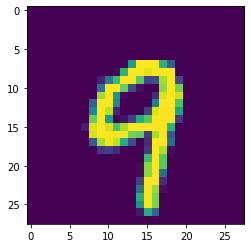

In [12]:
plt.imshow(mnist.train.images[4070].reshape(28,28))

In [13]:
batch_x, batch_y =mnist.train.next_batch(500)

In [14]:
batch_x.shape

(500, 784)

In [15]:
batch_y.shape

(500, 10)

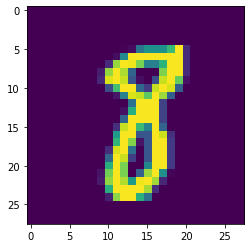

In [16]:
plt.imshow(batch_x[90].reshape(28,28))

In [17]:
batch_y[90]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.])

In [18]:
print(batch_y[90].argmax())

8


## Create a Model

In [19]:
#define place holder for feature and labels
x=tf.placeholder(tf.float32,[None,784]) #2 feature
y_true=tf.placeholder(tf.float32,[None,10]) #labels
##Layer - 1
W=tf.Variable(tf.truncated_normal([784,200],stddev=0.1))
b=tf.Variable(tf.truncated_normal([200],stddev=0.1))
I=tf.add(tf.matmul(x,W),b)
#Activation Function
output=tf.nn.relu(I)

##Layer - 2
W2=tf.Variable(tf.truncated_normal([200,100],stddev=0.1))
b2=tf.Variable(tf.truncated_normal([100],stddev=0.1))
I2=tf.add(tf.matmul(output,W2),b2)
#Activation Function
output2=tf.nn.relu(I2)

##Layer - 3
W3=tf.Variable(tf.truncated_normal([100,60],stddev=0.1))
b3=tf.Variable(tf.truncated_normal([60],stddev=0.1))
I3=tf.add(tf.matmul(output2,W3),b3)
#Activation Function
output3=tf.nn.relu(I3)

##Layer - 4
W4=tf.Variable(tf.truncated_normal([60,30],stddev=0.1))
b4=tf.Variable(tf.truncated_normal([30],stddev=0.1))
I4=tf.add(tf.matmul(output3,W4),b4)
#Activation Function
output4=tf.nn.relu(I4)

##Layer - 5
W5=tf.Variable(tf.truncated_normal([30,10],stddev=0.1))
b5=tf.Variable(tf.truncated_normal([10],stddev=0.1))
I5=tf.add(tf.matmul(output4,W5),b5)
#Activation Function
output5=tf.nn.softmax(I5)

In [20]:
#define the cost/loss fun and the optimizer

individual_loss =tf.nn.softmax_cross_entropy_with_logits_v2(labels=y_true,logits=output5)
loss=tf.reduce_mean(individual_loss)
#optimizer:
gdo=tf.train.GradientDescentOptimizer(learning_rate=0.5)
train=gdo.minimize(loss)

In [21]:
#initialize the variables
init=tf.global_variables_initializer()
sess=tf.Session()
sess.run(init)

In [22]:
#training
for step in range(10000):
    batch_x,batch_y=mnist.train.next_batch(100)
    sess.run(train,feed_dict={x:batch_x,y_true:batch_y})

In [23]:
#inference-predict
#execute the output node in a session
predict=sess.run(output5,feed_dict={x:mnist.test.images})

In [24]:
predict

array([[5.2200128e-38, 1.4701934e-17, 1.8057301e-23, ..., 1.0000000e+00,
        3.2582152e-29, 3.2996156e-22],
       [5.5799868e-27, 2.1145879e-29, 1.0000000e+00, ..., 1.8174368e-23,
        2.9798795e-26, 0.0000000e+00],
       [1.3378117e-29, 1.0000000e+00, 4.7226459e-13, ..., 5.8953020e-09,
        2.0782426e-13, 9.7736680e-26],
       ...,
       [0.0000000e+00, 5.2260687e-31, 0.0000000e+00, ..., 1.5599881e-32,
        6.1959590e-32, 1.2897828e-24],
       [4.0352636e-25, 5.0958948e-26, 1.6763743e-35, ..., 1.1607081e-27,
        2.8028738e-19, 1.1670055e-24],
       [4.0977509e-23, 8.4312221e-32, 1.7498167e-19, ..., 3.0941643e-35,
        2.8144729e-22, 9.1383017e-38]], dtype=float32)

In [25]:
#argmax will give the predicted value in terms of a number
result=sess.run(tf.argmax(predict,axis=1))

In [26]:
result

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [27]:
result.shape

(10000,)

In [28]:
#same way get the label value using argmax
labhot=sess.run(tf.argmax(mnist.test.labels,axis=1))

In [29]:
labhot

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [30]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(result,labhot)

0.9686

## Running Inference

In [31]:
test_image,test_label=mnist.validation.next_batch(1)
mymax=tf.argmax(output5,1)
print("Predicted value:",sess.run(mymax,feed_dict={x:test_image}))

Predicted value: [6]


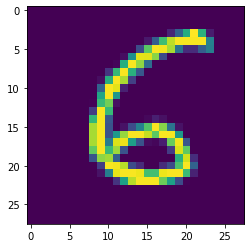

In [32]:
#display the image
plt.imshow(test_image.reshape(28,28))